# 20W/50Ω µDummy Load: Impedance Analysis

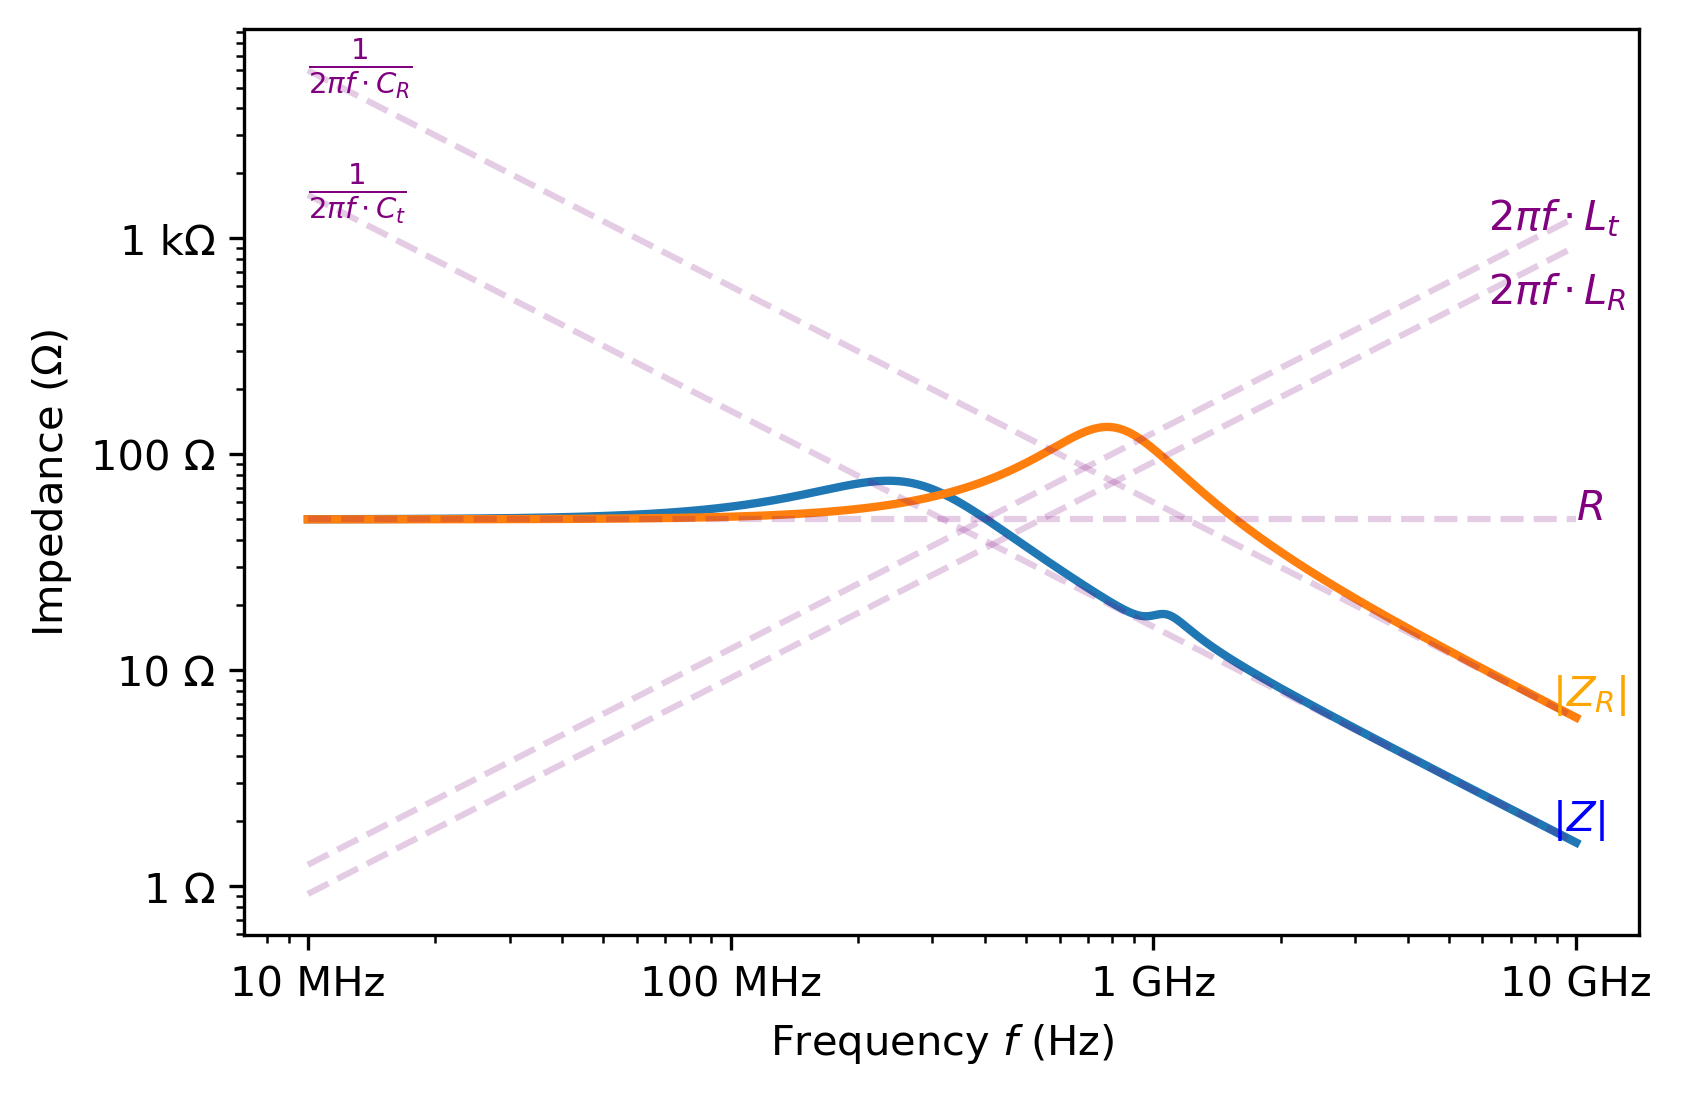

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter

ff = np.logspace(7, 10, 1000)
ww = 2*np.pi*ff
ss = 1j*ww

# compute impedance of discrete components
RR = np.ones_like(ss) * 50.0
LLr = ss * 14.65e-9
CCr = 1 / ss / 2.65e-12
LLt = ss * 20e-9
CCt = 1 / ss / 10e-12

# compute combined impedance
ZZr = RR + LLr
ZZr = 1/(1/ZZr + 1/CCr)
ZZ = ZZr + LLt
ZZ = 1/(1/ZZ + 1/CCt)

# Plotting ---------------------------------------------------------------------------
REF_TRACE_OPTS = dict(ls='--', alpha=0.2, color='purple')

plt.figure(dpi=300)
ax = plt.gca()

plt.loglog(ff, abs(ZZ), lw=2, label='$|Z|$')
plt.loglog(ff, abs(ZZr), lw=2, label='$|Z_R|$')
plt.loglog(ff, abs(RR), **REF_TRACE_OPTS)
plt.loglog(ff, abs(LLr), **REF_TRACE_OPTS)
plt.loglog(ff, abs(CCr), **REF_TRACE_OPTS)
plt.loglog(ff, abs(LLt), **REF_TRACE_OPTS)
plt.loglog(ff, abs(CCt), **REF_TRACE_OPTS)

plt.annotate('$|Z|$', (ff[-20], abs(ZZ[-20])), color='blue')
plt.annotate('$|Z_R|$', (ff[-20], abs(ZZr[-20])), color='orange')
plt.annotate('$R$', (ff[-1], abs(RR[-1])), color='purple')
plt.annotate('$2\pi f \cdot L_R $', (ff[-70], abs(LLr[-90])), color='purple')
plt.annotate('$\\frac{1}{2\pi f \cdot C_R}$', (ff[0], abs(CCr[10])), color='purple')
plt.annotate('$2\pi f \cdot L_t$', (ff[-70], abs(LLt[-20])), color='purple')
plt.annotate('$\\frac{1}{2\pi f \cdot C_t}$', (ff[0], abs(CCt[10])), color='purple')

ax.xaxis.set_major_formatter(EngFormatter(unit='Hz'))
ax.yaxis.set_major_formatter(EngFormatter(unit='Ω'))
plt.xlabel('Frequency $f$ (Hz)')
plt.ylabel('Impedance ($\Omega$)')
plt.show()

In [81]:
ff0 = [10e6, 50e6, 100e6, 150e6]
ZZ0 = [ZZ[np.argmin(np.abs(ff - f0))] for f0 in ff0]
deltaR = np.abs(ZZ0) - 50.0
print(deltaR)

[ 0.07350786  1.84008044  7.23476183 15.473421  ]


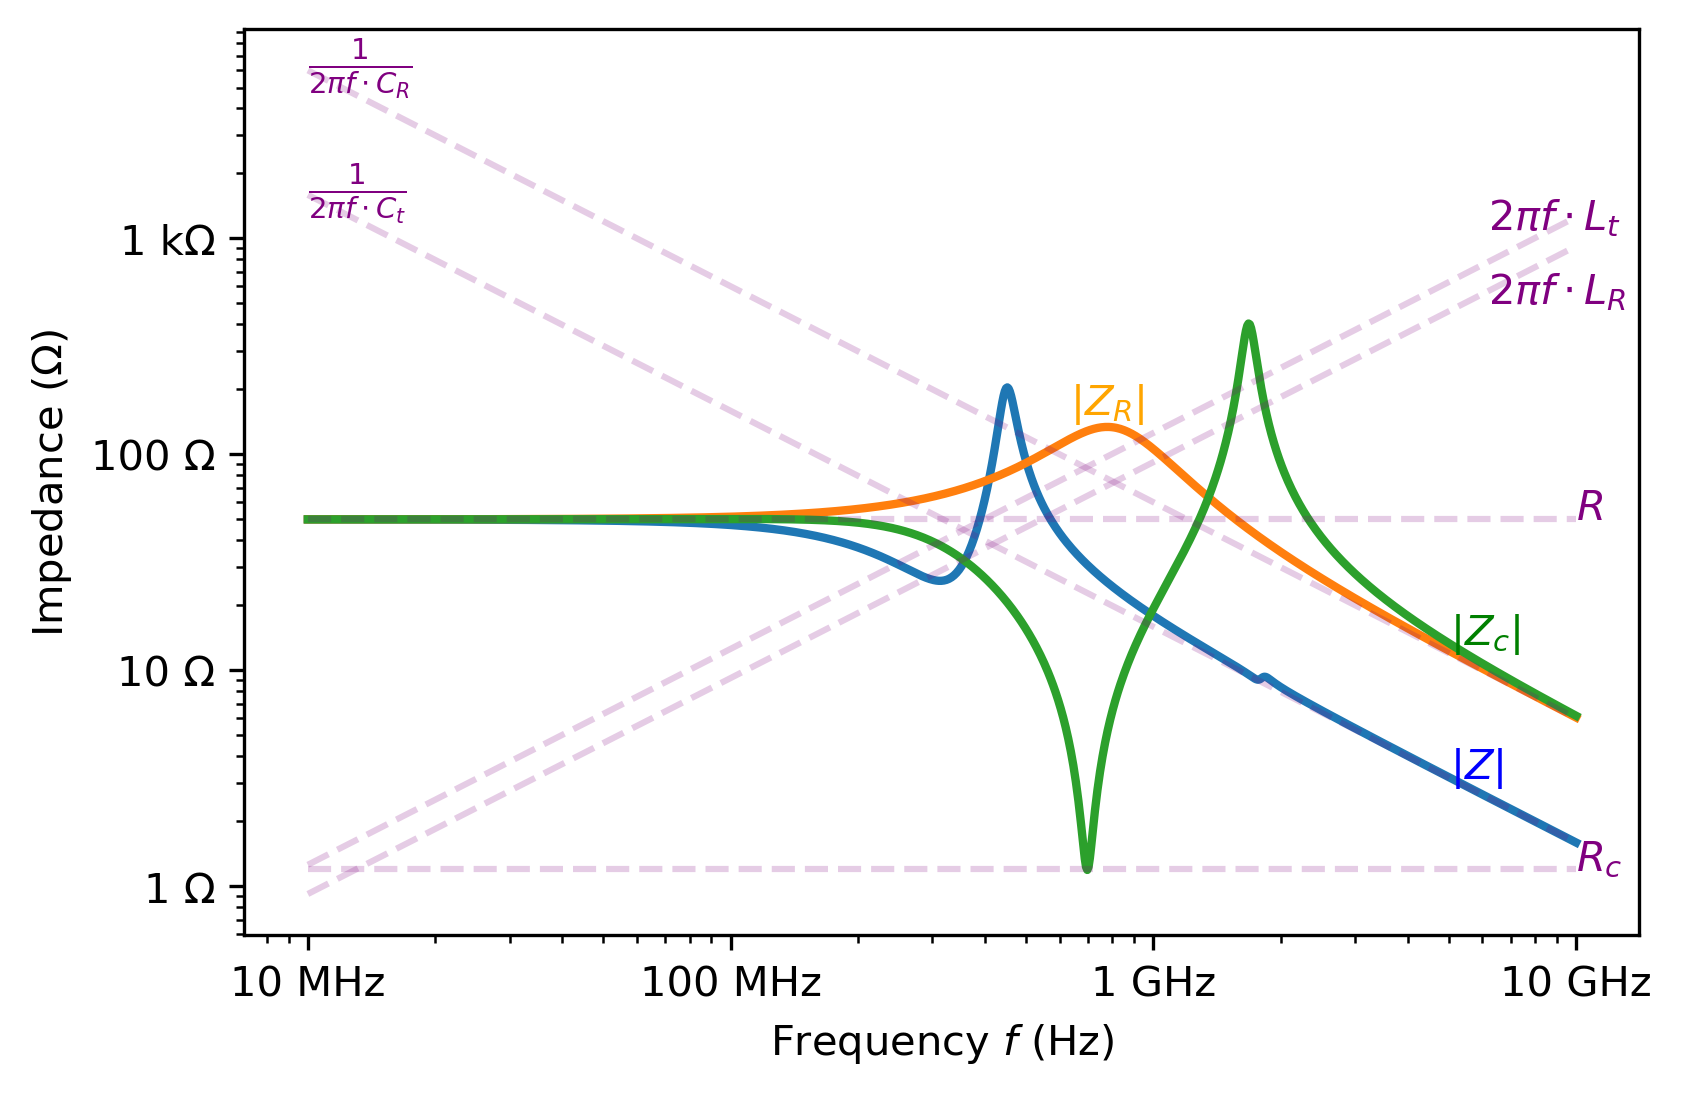

In [82]:
# compute impedance of discrete components
RRc = np.ones_like(ss) * 1.2
LLc = ss * 5.2e-9
CCc = 1 / ss / 10e-12

# compute combined impedance
ZZc = 1/(1/ZZr + 1/(RRc + LLc + CCc))
ZZ = ZZc + LLt
ZZ = 1/(1/ZZ + 1/CCt)

# Plotting ---------------------------------------------------------------------------
plt.figure(dpi=300)
ax = plt.gca()

plt.loglog(ff, abs(ZZ), lw=2, label='$|Z|$')
plt.loglog(ff, abs(ZZr), lw=2, label='$|Z_R|$')
plt.loglog(ff, abs(ZZc), lw=2, label='$|Z_c|$')
plt.loglog(ff, abs(RR), **REF_TRACE_OPTS)
plt.loglog(ff, abs(LLr), **REF_TRACE_OPTS)
plt.loglog(ff, abs(CCr), **REF_TRACE_OPTS)
plt.loglog(ff, abs(LLt), **REF_TRACE_OPTS)
plt.loglog(ff, abs(CCt), **REF_TRACE_OPTS)
plt.loglog(ff, abs(RRc), **REF_TRACE_OPTS)

plt.annotate('$|Z|$', (ff[-100], abs(ZZ[-100])), color='blue')
plt.annotate('$|Z_R|$', (ff[-400], abs(ZZr[-400])*1.3), color='orange')
plt.annotate('$|Z_c|$', (ff[-100], abs(ZZc[-100])), color='green')
plt.annotate('$R$', (ff[-1], abs(RR[-1])), color='purple')
plt.annotate('$2\pi f \cdot L_R $', (ff[-70], abs(LLr[-90])), color='purple')
plt.annotate('$\\frac{1}{2\pi f \cdot C_R}$', (ff[0], abs(CCr[10])), color='purple')
plt.annotate('$2\pi f \cdot L_t$', (ff[-70], abs(LLt[-20])), color='purple')
plt.annotate('$\\frac{1}{2\pi f \cdot C_t}$', (ff[0], abs(CCt[10])), color='purple')
plt.annotate('$R_c$', (ff[-1], abs(RRc[-1])), color='purple')

ax.xaxis.set_major_formatter(EngFormatter(unit='Hz'))
ax.yaxis.set_major_formatter(EngFormatter(unit='Ω'))
plt.xlabel('Frequency $f$ (Hz)')
plt.ylabel('Impedance ($\Omega$)')
plt.show()

In [83]:
ZZ0 = [ZZ[np.argmin(np.abs(ff - f0))] for f0 in ff0]
deltaR = np.abs(ZZ0) - 50.0
print(deltaR)

[-0.02538023 -0.6644275  -2.91922899 -7.16346536]
